<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/ml03_train_test_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 머신 러닝의 과정
    * 문제 정의 --> 데이터 준비 --> 데이터 탐색 --> 훈련 셋, 검증 셋, 테스트 셋 분리 --> 모델 선택, 훈련 --> 모델 평가 --> 모델 튜닝
* 훈련 셋, 검증 셋, 테스트 셋으로 나누는 방법
    * 순차 추출(sequential sampling)
    * 임의 추출(random sampling)
    * 층화 추출(stratified sampling)
* 분류 모델 평가 지표
    * 정확도(accuracy)
    * 정밀도(precision)
    * 재현율(recall)
    * F1-score
    * 민감도(sensitivity)
    * 특이도(spei
* 특성 스케일링
    * 표준화(standardization)
    * 정규화(normalization)

# 필요한 모듈, 클래스, 함수들을 import

In [ ]:
import numpy as np # ndarray(배열) 함수, 메서드
import pandas as pd # Series, DataFrame 함수, 메서드
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

# Machine Learning
# 머신 러닝 모델(알고리즘) - KNN 분류기
from sklearn.neighbors import KNeighborsClassifier
# 훈련/테스트 셋 분리 함수
from sklearn.model_selection import train_test_split
# 모델 평가 지표 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 특성 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 준비

* fish.csv 파일: 어종, 특성들(무게, 길이, ...)
* 2진 분류(도미, 빙어)
* 특성 

In [ ]:
fish_scv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [ ]:
fish = pd.read_csv(fish_scv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
df = fish.loc[fish['Species'].isin(['Bream', 'Smelt']),
              ['Species', 'Weight', 'Length']]
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [ ]:
df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [ ]:
# DataFrame을 특성과 타겟으로 분리하고 ndarray(배열)로 변환
features = df.iloc[:, 1:].values #DataFrame이기때문에 values를 사용해서 배열로 변환
target = df['Species'].values

In [ ]:
features.shape # (n_samples, n_features)

(49, 2)

In [ ]:
target.shape # (n_samples,)

(49,)

In [ ]:
features[:5, :]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
np.unique(target, return_counts=True) # 유일한 값과 개수

(array(['Bream', 'Smelt'], dtype=object), array([35, 14]))

## 훈련 셋, 테스트 셋 분리

## 순차 추출(sequential sampling)

* 훈련 셋:테스트 셋 = 7:3 
    * (거의 사용하지 X)

In [ ]:
49 * 0.7, 49 * 0.3

(34.3, 14.7)

In [ ]:
num_test = 35   # 훈련 셋의 샘플 개수 -> 테스트 셋의 샘플 개수: 48-35 = 14

In [ ]:
X_train = features[:num_test, :] # 훈련 셋
y_train = target[:num_test]      # 훈련 레이블
X_test = features[num_test:, :]  # 테스트 셋
y_test = target[num_test:]       # 테스트 레이블

In [ ]:
np.unique(y_train)
#> 훈련 셋에는 물고기의 종류가 모두 도미(Bream)만 있음.

array(['Bream'], dtype=object)

In [ ]:
np.unique(y_test)
#> 테스트 셋에는 모두 빙어(Smelt)만 있음.

array(['Smelt'], dtype=object)

In [ ]:
# train_test_split 함수를 사용한 순차 추출
X_train, X_test, y_train, y_test = train_test_split(features, target, # train_size or test_size중 하나만 기재하면 나머지가 계산되서 들어감,
                                                    train_size=35, # 훈련 셋의 샘플 개수
                                                    shuffle=False)  # 샘플을 섞지 않음 -> 순차 추출

In [ ]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
np.unique(y_train)

array(['Bream'], dtype=object)

In [ ]:
np.unique(y_test)

array(['Smelt'], dtype=object)

훈련 셋과 테스트 셋 시각화

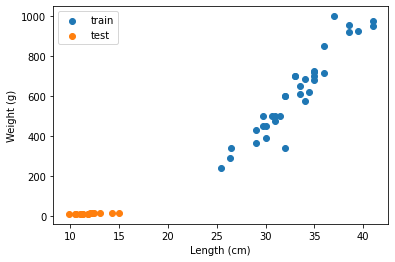

In [36]:
# X_train[:, 1]) length
plt.scatter(x=X_train[:, 1], y=X_train[:, 0], label='train') # 훈련셋
plt.scatter(x=X_test[:, 1], y=X_test[:, 1], label='test') # 테스트셋

plt.legend()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

### KNN 분류기 훈련, 예측, 평가

In [ ]:
knn = KNeighborsClassifier() # 머신 러닝 모델 생성

In [ ]:
knn.fit(X_train, y_train) # 머신 러닝 모델 훈련

KNeighborsClassifier()

In [ ]:
# 훈련 셋에서의 예측 결과 평가
train_pred = knn.predict(X_train)
train_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
# 훈련 셋의 실젯값(훈련 레이블)
y_train

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
# 훈련 셋 정확도
train_acc = np.mean(train_pred == y_train)
train_acc

1.0

In [34]:
# 테스트 셋에서의 예측 결과 평가
test_pred = knn.predict(X_test)
test_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [37]:
# 테스트 셋의 실젯값(테스트 레이블)
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [39]:
# 테스트 셋 정확도
test_acc = np.mean(test_pred == y_test)
test_acc

0.0

## 임의 추출(Random Sampling)

In [40]:
idx = np.arange(49)
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[42 41  1 18 29 47 37 38 11 20  4 39 13 31  5  8 45 32 14 25  0  2 40  7
 19 46 15 48 17 36 21 35 16 12 28  9 27 43  3  6 30 44 24 10 23 34 22 33
 26]


In [47]:
# 훈련 셋/테스트 셋을 임의 추출 방식으로 분리
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size=35, # g
                                                    shuffle=True,
                                                    random_state=42)

In [48]:
# 훈련 셋, 테스트 셋의 shape
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [49]:
# 훈련 레이블, 테스트 레이블의 shape
y_train.shape, y_test.shape

((35,), (14,))

In [52]:
# 훈련 레이블에서 도미(Bream)/빙어(Smelt)의 빈도수
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 11]))

In [51]:
# 테스트 레이블에서 도미/빙어의 빈도수
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  3]))

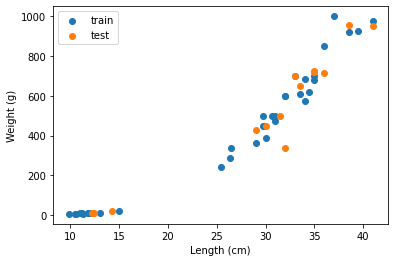

In [57]:
# 훈련 셋/테스트 셋 시각화
plt.scatter(x=X_train[:, 1], y=X_train[:, 0], label='train') # 훈련셋 산점도
plt.scatter(x=X_test[:, 1], y=X_test[:, 0], label='test') # 테스트셋 산점도

plt.legend()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

### KNN 모델 훈련, 예측, 평가

In [58]:
knn = KNeighborsClassifier() # 모델 생성

In [59]:
knn.fit(X_train, y_train) # 모델 훈련

KNeighborsClassifier()

In [61]:
train_pred = knn.predict(X_train) # 훈련 셋에서의 예측 값
print(train_pred)

['Bream' 'Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt']


In [63]:
print(y_train) #실젯값(훈련 셋 레이블)

['Bream' 'Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt']


In [64]:
train_acc = knn.score(X_train, y_train) # 훈련 셋 정확도
train_acc

1.0

In [65]:
test_pred = knn.predict(X_test) # 테스트 셋의 예측 값
print(test_pred)

['Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [66]:
print(y_test) # 테스트 셋 실젯값(테스트 레이블)

['Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [67]:
test_acc = knn.score(X_test, y_test) # 테스트 셋 정확도
test_acc

1.0

## 층화 추출(Stratified Sampling)

데이터 셋에서 각 클래스의 비율이 훈련 셋과 테스트 셋에서 비슷하게 유지되도록 샘플링을 하는 방법

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3,
                                                    stratify=target,
                                                   


`train_test_split` 파라미터 설명

* train_size: 훈련 셋의 개수(비율), test_size: 테스트 셋의 개수(비율)
    * train_size 또는 test_size 중 하나만 값을 전달하면 다른 하나는 자동으로 계산됨.
    * 정수로 값을 전달한 경우는 훈련(테스트) 셋의 샘플 개수를 의미.
    * 0 ~ 1 사이의 실수로 값을 전달한 경우에는 전체 샘플 중 훈련(테스트) 셋의 비율을 의미.
* statify: 층화 추출의 기준이 되는(각 클래스의 비율을 알 수 있는) 1차원 배열.
* random_state: 난수 생성 seed 설정.
* shuffle: 샘플들을 섞을 지 말 지를 결정. 기본 값은 True.

In [80]:
X_train.shape, X_test.shape # 훈련 셋의 shape, 테스트 셋의 shape

((34, 2), (15, 2))

In [72]:
y_train.shape, y_test.shape # 훈련 레이블의 shape, 테스트 셋의 label

((35,), (14,))

In [79]:
# 훈련 셋에서 도미(Bream)/빙어(Smelt)의 빈도수
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 10]))

In [75]:
24/34/ 10/34

0.0020761245674740486

In [78]:
# 테스트 셋에서 도미/빙어 빈도수
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  4]))

In [81]:
11/15, 4/15

(0.7333333333333333, 0.26666666666666666)

## KNN 모델 훈련, 예측 평가

In [88]:
knn = KNeighborsClassifier() # 모델 생성

In [90]:
knn.fit(X_train, y_train) # 모델 훈련

KNeighborsClassifier()

In [91]:
train_pred = knn.predict(X_train) # 훈련 셋 예측 값
print(train_pred)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt'
 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Smelt']


In [92]:
print(y_train) # 훈련 레이블

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt'
 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Smelt']


In [95]:
train_acc = knn.score(X_train, y_train) # 훈련 셋에서의 정확도
train_acc

1.0

In [96]:
test_pred = knn.predict(X_test) # 테스트 셋 예측값
print(test_pred)

['Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt']


In [97]:
print(y_test) # 테스트 셋의 실젯값(테스트 레이블)

['Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt']


In [99]:
test_acc = knn.score(X_test, y_test)
test_acc

1.0

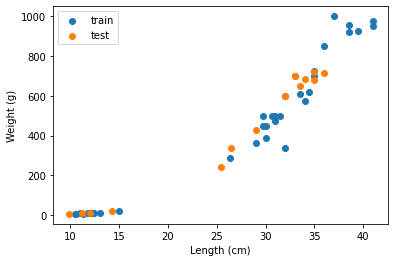

In [102]:
# 훈련 셋, 테스트 셋 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='test')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()